# Loading External Data

We will learn a few examples on how to load external data in NumPy. There are a number of ways to load data, but we will learn some practical ways to bring in data from pandas, CSV files, SQL, and image files. This will give you an idea of how external data is loaded into NumPy with various patterns. 

## Loading Data Files into NumPy 

When you are loading tabular data into NumPy, you might consider using pandas first which we will discuss later. This has the benefit of maintaining column names and metadata that NumPy usually strips out for computing efficiency. But If you have a numeric dataset, like a CSV with just numeric values, you can use the `loadtxt()` function. 

Below I read a CSV file straight from my Github and provide it as the file name `fname`. I specify the comma `,` as the `delimiter`, and I skip 1 row knowing that the header column names need to be omitted. 

In [2]:
import numpy as np 

url = r"https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/winequality-red.csv" 

X = np.loadtxt(fname=url, delimiter=",", skiprows=1)
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

Be sure to [read the documentation on `loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html#numpy.loadtxt) if you intend to use it. Consider using pandas if you need to clean and manipulate the data first, or it needs to be turned into numeric data. For example, you may have categories "dog", "cat", and "bird" which need to be category numbers 1, 2, and 3. 

## Loading Data from pandas

It is first important to establish that pandas and NumPy are not in competition. As a matter of fact, you will find it common to import a pandas `DataFrame` and turn into a NumPy `ndarray`. They are just different tools used for different problems. Generally when you are working with a lot of tabular data (that is two-dimensional with simply rows and columns) of different datatypes, pandas is going to be your best bet for that task. Think of spreadsheet tasks, and that is where pandas will excel (no pun intended). 

NumPy is going to be preferred when you are dealing with numerical data in higher dimensions, and you start to get intensive on the mathematical operations. Think importing images where each image has 3 layers (the red, green, and blue channels) and you have a whole stack of images representing frames in videos. This is definitely not something pandas is streamlined for, while NumPy will do this task more effectively. 

That being said you take any pandas `DataFrame` (or certain columns of it) and turn it into a Numpy `ndarray` using the `values` property. We will see this more in action later. 

In [3]:
import pandas as pd
import numpy as np 

df = pd.DataFrame({'x': [1, 2], 'y' : [3,4]})
df

,x,y
0,1,3
1,2,4


In [4]:
my_array = df.values
my_array

array([[1, 3],
       [2, 4]])

In [5]:
type(my_array)

numpy.ndarray

This is a pretty common workflow for me, using `read_csv()` on a dataset using pandas and extracting out the values for NumPy. I do the same thing using the `read_sql()` function in pandas. 

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/winequality-red.csv")

df.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

## Loading Data from SQL 

To briefly see how to bring in numeric data from a SQL database, let's use SQLite and download a SQLite database. We will then create a connection to it. 

In [7]:
import urllib.request
import sqlite3

urllib.request.urlretrieve("https://github.com/thomasnield/anaconda_intro_to_sql/blob/main/company_operations.db?raw=true", "company_operations.db")
conn = sqlite3.connect('company_operations.db')

We can create a cursor to execute a query for two columns, call `fetchall()` to return a list of the results, and then use `np.array()` to package them into an array. 

In [8]:
cursor = conn.cursor()
cursor.execute("SELECT CUSTOMER_ORDER_ID, QUANTITY FROM CUSTOMER_ORDER")
results = np.array(cursor.fetchall())
results

array([[   1,   20],
       [   2,  110],
       [   3,  120],
       ...,
       [1996,   80],
       [1997,   20],
       [1999,  100]])

But once again, pandas might be preferable as it is more streamlined with `read_sql()`. You can then call `.values` to convert the `DataFrame` to an `ndarray`. 

In [10]:
import pandas as pd 

df = pd.read_sql("SELECT CUSTOMER_ORDER_ID, QUANTITY FROM CUSTOMER_ORDER", conn)
df.values

array([[   1,   20],
       [   2,  110],
       [   3,  120],
       ...,
       [1996,   80],
       [1997,   20],
       [1999,  100]])

## Loading an Image 

Recall that an image is going to be a multidimensional array with red, green, and blue channels making up three layers. 

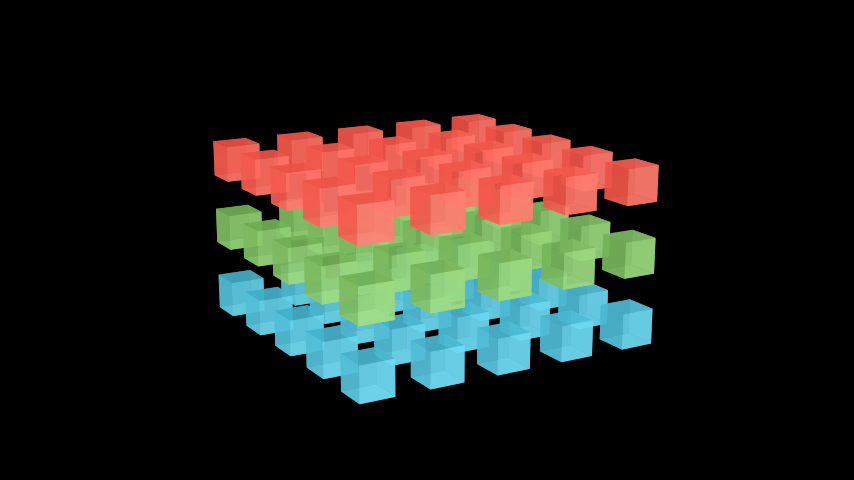


If you are not using Conda, make sure to install `matplotlib` and `pillow` for this next step. 

In [ ]:
!pip install matplotlib pillow 

We are going to import an image as a NumPy array. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image 

# Download the image file 
url = r"https://img.freepik.com/free-photo/isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg?w=1800&t=st=1690429756~exp=1690430356~hmac=62b3f269479c67fe46d3fa008d9a999d8c6979b69054b84cfd4304d5b41e41a7"
urllib.request.urlretrieve(url, "happy_dog.png")

# Load the image file
image = Image.open("happy_dog.png")

# Convert the image to a NumPy array
image_array = np.array(image)

# Print the shape of the array
print(image_array.shape)

image_array

(1200, 1800, 3)


array([[[252, 253, 255],
        [252, 253, 255],
        [252, 253, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[252, 253, 255],
        [252, 253, 255],
        [252, 253, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[252, 253, 255],
        [252, 253, 255],
        [252, 253, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Note from above we are literally storing a 1200x1800 image with three layers representing the red, green, and blue channels. Let's see what matplotlib does with it! 

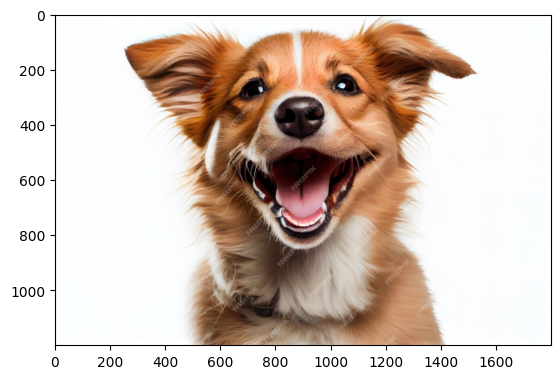

In [12]:
# Save the array as a PNG image
plt.imshow(image_array)

Kind of neat, right? We literally were holding this entire image using an `ndarray`. We will revist this image in future sections such as isolating the red, green, and blue channels using slicing. 

## Exercise

Turn this pandas `DataFrame` into a NumpPy `ndarray`. 

In [ ]:
import pandas as pd
import numpy as np 

df = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv")

## PUT YOUR CODE BELOW 



### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

This should have been an easy one. You can let pandas do all the heavy-lifting for you using `.values` to give you the NumPy array. 

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv")

## PUT YOUR CODE BELOW 
df.values